In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
# read csv files
df_cap = pd.read_csv('../../Data/Downloaded_Old/post_cap.csv')
df_GDP = pd.read_csv('../../Data/Downloaded_Old/post_GDP.csv')
df_cns = pd.read_csv('../../Data/Downloaded_Old/post_real_cns.csv')

In [30]:
# parameters
α_KA  = 0.15
α_LA  = 0.55
α_KM  = 0.66
α_LM  = 0.34
η     = 0.15
γ_pre = 60
#γ_post = 76.4
γ_post = 68.8 
δ     = 0.05
β     = 0.96

In [31]:
# create the ratio of marginal utility
df_cns['cA-γ/cM'] = (df_cns['real_food_cns'] - γ_post) / df_cns['real_non_food_cns']
df_cns['mu_M/mu_A'] = (1-η) / η * df_cns['cA-γ/cM']

In [32]:
# change d type for merge
df_cap['year_jpn'] = df_cap['year_jpn'].astype(str)
df_GDP['year_jpn'] = df_GDP['year_jpn'].astype(str)

In [33]:
# divide by 1000 to make the unit common. 
denom = 1000

columns = ['tot_cap', 'prm_cap', 'non_prm_cap']
for column in columns:
    df_cap[column] = df_cap[column] / denom

In [34]:
df_GDP_cap = pd.merge(df_GDP, df_cap, on = 'year_jpn')

In [35]:
df_GDP_cap_picked = df_GDP_cap[['year_wst', 'prm_GDP', 'non_prm_GDP', 'prm_cap', 'non_prm_cap']].copy()

In [36]:
df_GDP_cap_picked['F_KA'] = α_KA * df_GDP_cap_picked['prm_GDP'] / df_GDP_cap_picked['prm_cap'] 

In [37]:
df_GDP_cap_picked['F_KM'] = α_KM * df_GDP_cap_picked['non_prm_GDP'] / df_GDP_cap_picked['non_prm_cap'] 

In [38]:
df_GDP_cap_picked['F_KM/F_KA'] = df_GDP_cap_picked['F_KM'] / df_GDP_cap_picked['F_KA']

In [39]:
df_merged = pd.merge(df_GDP_cap_picked, 
                    df_cns[['year_wst', 'mu_M/mu_A']], on = 'year_wst')

In [40]:
df_merged['norm_cap_wedge'] = df_merged['mu_M/mu_A'] * df_merged['F_KM/F_KA']

In [41]:
df_merged['norm_cap_wedge-1'] = df_merged['norm_cap_wedge'] - 1

<AxesSubplot:xlabel='year_wst'>

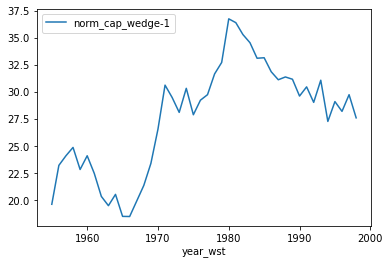

In [42]:
fig, ax = plt.subplots()
df_merged.plot(x = 'year_wst', y = 'norm_cap_wedge-1', ax = ax)

In [43]:
df_merged.to_csv('../../Data/Results/post_cap_w.csv', index = False)

In [44]:
(df_merged.loc[3].norm_cap_wedge - df_merged.loc[11].norm_cap_wedge) / df_merged.loc[3].norm_cap_wedge

0.2467488868418013

In [45]:
df_merged.loc[0:15]['norm_cap_wedge-1'].mean()

21.857485052628107

In [46]:
df_merged['YM/YA'] = df_merged['non_prm_GDP']/df_merged['prm_GDP']

In [47]:
df_merged['KM/KA'] = df_merged['non_prm_cap']/df_merged['prm_cap']

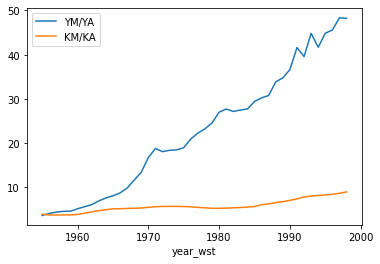

In [48]:
fig, ax = plt.subplots()
df_merged.plot(x = 'year_wst', y = 'YM/YA', ax = ax)
df_merged.plot(x = 'year_wst', y = 'KM/KA', ax = ax)
plt.legend()

In [50]:
#df_merged.to_csv('../../Data/Results/post_cap_w_test.csv', index = False)

In [54]:
df_GDP_cap['F_K'] = α_KM * df_GDP_cap['tot_prv_GDP'] / df_GDP_cap['tot_cap'] 

<AxesSubplot:xlabel='year_wst'>

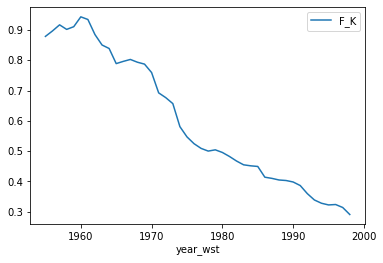

In [56]:
fig, ax = plt.subplots()
df_GDP_cap.plot(x = 'year_wst', y = 'F_K', ax = ax)